# 1. 환경 준비

In [96]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!
import scipy.stats as spst

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [62]:
path = 'https://raw.githubusercontent.com/tiagyu/KT_AIVLE/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/heart_dataset.csv'
data = pd.read_csv(path)

|	변수명	|	설명	|	구분	|
|----|----|----|
|	target 	|	 heart disease(심장병), 0 = Normal(정상)	|	Target	|
|	age 	|	나이	|	feature	|
|	gender 	|	1 = male, 0 = female	|	feature	|
|	Chest Pain Type(흉통 유형) 	|	      1: typical angina (전형적인 협심증) <br>   2: atypical angina,(비정형 협심증) <br>   3: non-anginal pain (비협심증 통증) <br>   4:  asymptomatic (무증상)	|	feature	|
|	resting bp s 	|	안정 혈압	|	feature	|
|	cholesterol 	|	혈청 콜레스테롤	|	feature	|
|	Fasting Blood sugar(공복혈당) 	|	 (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)	|	feature	|
|	resting ecg (안정시 심전도 결과) 	|	 - 0: normal (정상) <br> - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>     ST-T파 이상 (T파 역전 및/또는 ST 상승 또는 저하 > 0.05mV) <br> - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria (Estes 기준에 따라 가능성이 있거나 확실한 좌심실 비대를 나타냄)	|	feature	|
|	max heart rate 	|	 최대 심박수	|	feature	|
|	exercise angina 	|	 운동으로 인한 협심증 <br> (1 = Yes, 0 = No)	|	feature	|
|	oldpeak 	|	 휴식 대비 운동 후 ST 우울증	|	feature	|
|	ST slope 	|	 최대 운동 ST 세그먼트의 기울기 <br> - 1: upsloping 상승 <br> - 2: flat평탄 <br> - 3: downsloping하락	|	feature	|



# 2. 데이터 이해

In [63]:
# 상위 데이터 확인
data.head()

,age,gender,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
#하위 데이터 확인
data.tail()

,age,gender,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [64]:
#데이터 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   object 
 1   gender               1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   object 
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   object 
 8   exercise angina      1190 non-null   object 
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 111.7+ KB


- age, resting bp s, max heart rate, exercise anigna object type

In [65]:
# 특정 문자열이 포함된 행 찾기 (첫 행 제외)
specific_strings = ['?', '???', '!']
strings_rows = data.applymap(lambda x: isinstance(x, str) and x in specific_strings).any(axis=1)

# 특정 문자열이 포함된 행의 인덱스를 얻기
indexes_to_drop = data[strings_rows].index

# 특정 문자열이 포함된 행을 데이터프레임에서 제거
data = data.drop(indexes_to_drop)


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1186 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1186 non-null   object 
 1   gender               1186 non-null   int64  
 2   chest pain type      1186 non-null   int64  
 3   resting bp s         1186 non-null   object 
 4   cholesterol          1186 non-null   int64  
 5   fasting blood sugar  1186 non-null   int64  
 6   resting ecg          1186 non-null   int64  
 7   max heart rate       1186 non-null   object 
 8   exercise angina      1186 non-null   object 
 9   oldpeak              1186 non-null   float64
 10  ST slope             1186 non-null   int64  
 11  target               1186 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 120.5+ KB


In [69]:
#type변환
data = data.astype({'age':'int64',
                   'resting bp s':'int64',
                   'exercise angina':'int64',
                   'max heart rate':'int64'})

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1186 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1186 non-null   int64  
 1   gender               1186 non-null   int64  
 2   chest pain type      1186 non-null   int64  
 3   resting bp s         1186 non-null   int64  
 4   cholesterol          1186 non-null   int64  
 5   fasting blood sugar  1186 non-null   int64  
 6   resting ecg          1186 non-null   int64  
 7   max heart rate       1186 non-null   int64  
 8   exercise angina      1186 non-null   int64  
 9   oldpeak              1186 non-null   float64
 10  ST slope             1186 non-null   int64  
 11  target               1186 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 120.5 KB


In [71]:
#기술통계 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1186.0,53.697302,9.360133,28.0,47.0,54.0,60.0,77.0
gender,1186.0,0.763069,0.425379,0.0,1.0,1.0,1.0,1.0
chest pain type,1186.0,3.232715,0.936720,1.0,3.0,4.0,4.0,4.0
resting bp s,1186.0,132.190556,18.383834,0.0,120.0,130.0,140.0,200.0
cholesterol,1186.0,210.893761,101.037206,0.0,188.5,229.0,270.0,603.0
fasting blood sugar,1186.0,0.211636,0.408640,0.0,0.0,0.0,0.0,1.0
resting ecg,1186.0,0.698145,0.870489,0.0,0.0,0.0,2.0,2.0
max heart rate,1186.0,139.844013,25.483148,60.0,121.0,141.0,160.0,202.0
exercise angina,1186.0,0.387015,0.487273,0.0,0.0,0.0,1.0,1.0
oldpeak,1186.0,0.924368,1.082327,-2.6,0.0,0.6,1.6,6.2


In [72]:
#nan 값 확인
data.isnull().sum()

age                    0
gender                 0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

# 3. 단변량 분석

In [73]:
target = 'target'
data[target].value_counts()

target
1    627
0    559
Name: count, dtype: int64

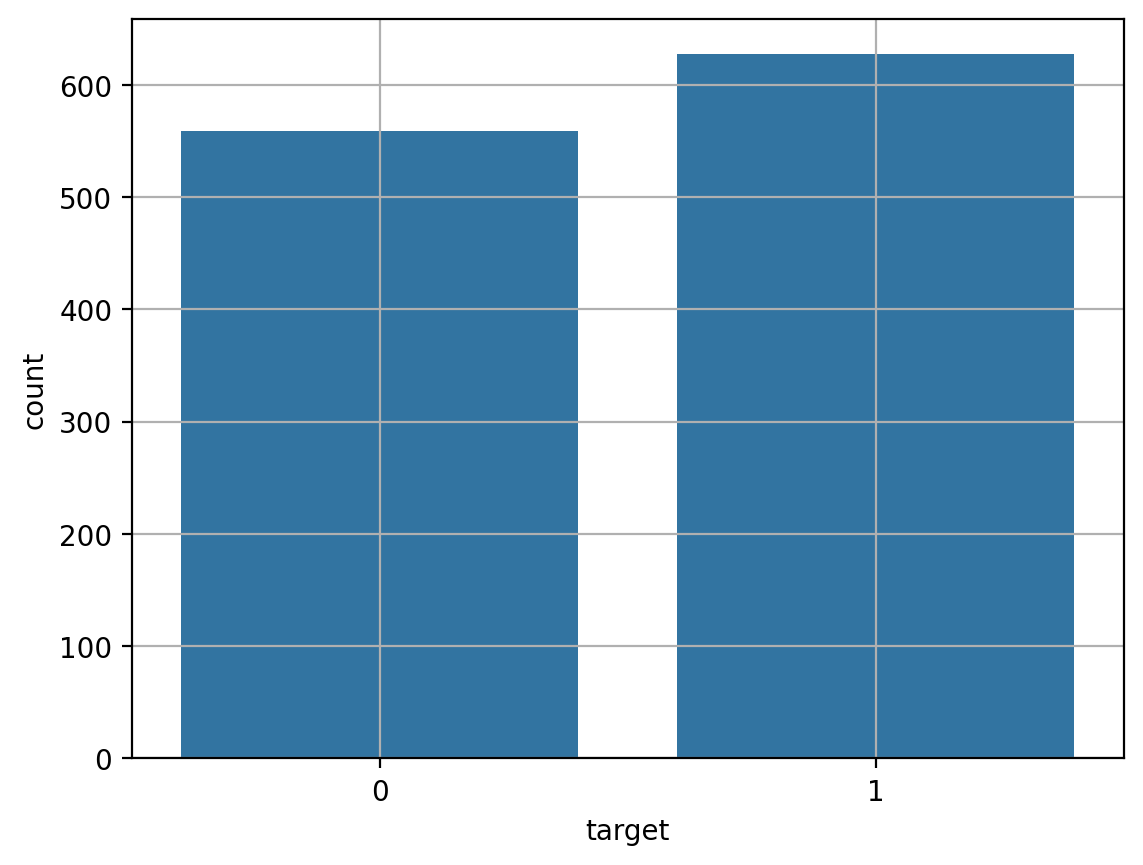

In [74]:
sns.countplot(x=target,data=data)
plt.grid()
plt.show()

# 4. 범주 -> 범주

In [75]:
target = 'target'

In [115]:
def classification(target,feature):
    #교차표
    print('<교차표>')
    table = pd.crosstab(data[target],data[feature])
    display(table)
    
    #시각화 mosaic
    print('<시각화 : mosaic>')
    mosaic(data,[feature,target])
    plt.axhline(1-data[target].mean(),color='r')
    plt.show()
    
    #시각화 plot.bar
    print('<시각화 : plot bar>')
    table.plot.bar(stacked=True)
    plt.axhline(1-data[target].mean(),color='r')
    plt.show()
    
    #카이제곱검정
    print('<카이제곱검정>')
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    print('기대빈도\n',result[3])
    return

### **(1) gender -> target**

<교차표>


gender,0,1
target,,
0,211,348
1,70,557


<시각화 : mosaic>


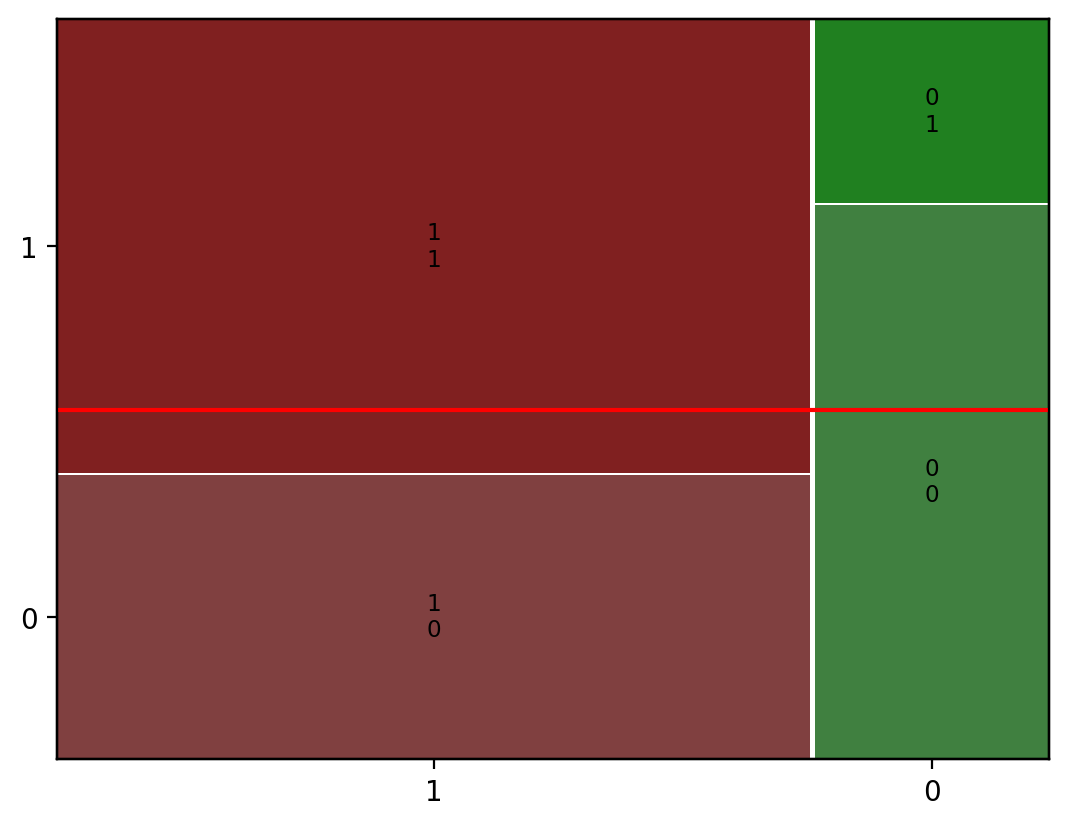

<시각화 : plot bar>


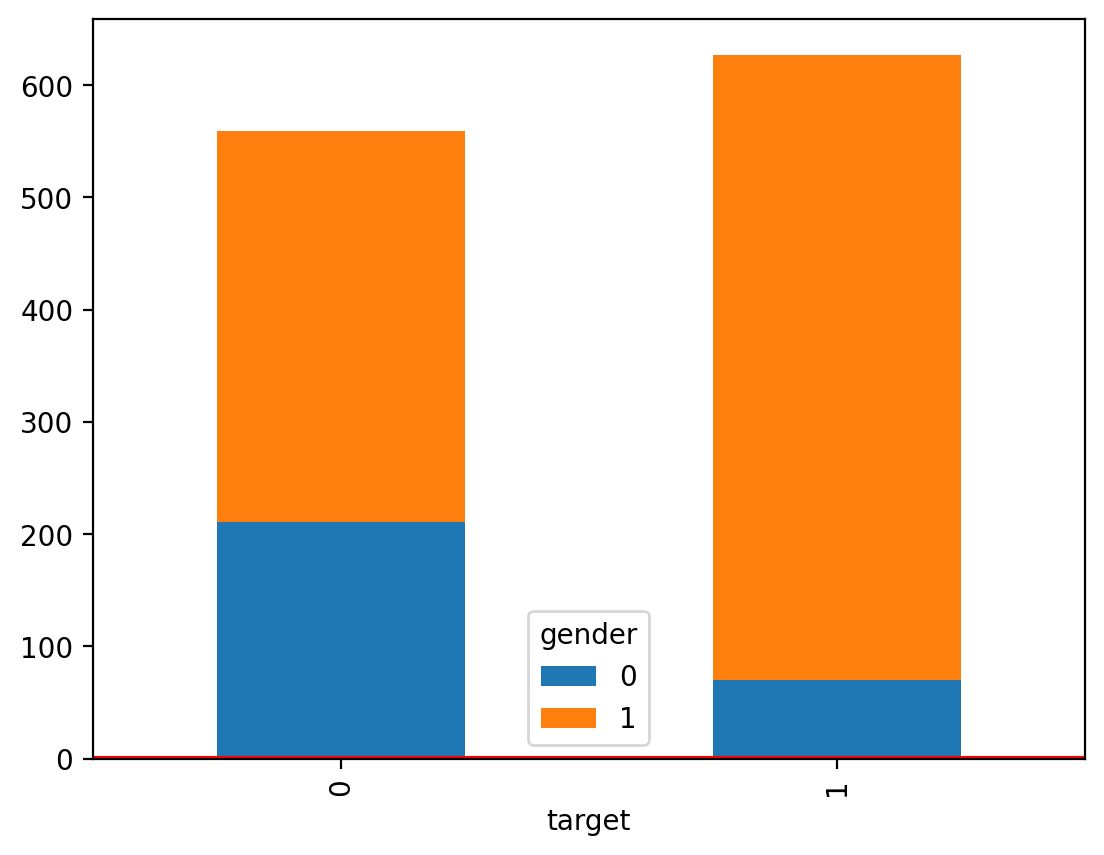

<카이제곱검정>
카이제곱통계량 114.03246175283647
p-value 1.2819259547278245e-26
자유도 1
기대빈도
 [[132.44435076 426.55564924]
 [148.55564924 478.44435076]]


In [116]:
feature = 'gender'
classification(target,feature)

### **(2) Chest Pain Type -> target**

<교차표>


chest pain type,1,2,3,4
target,,,,
0,41,185,191,142
1,25,31,89,482


<시각화 : mosaic>


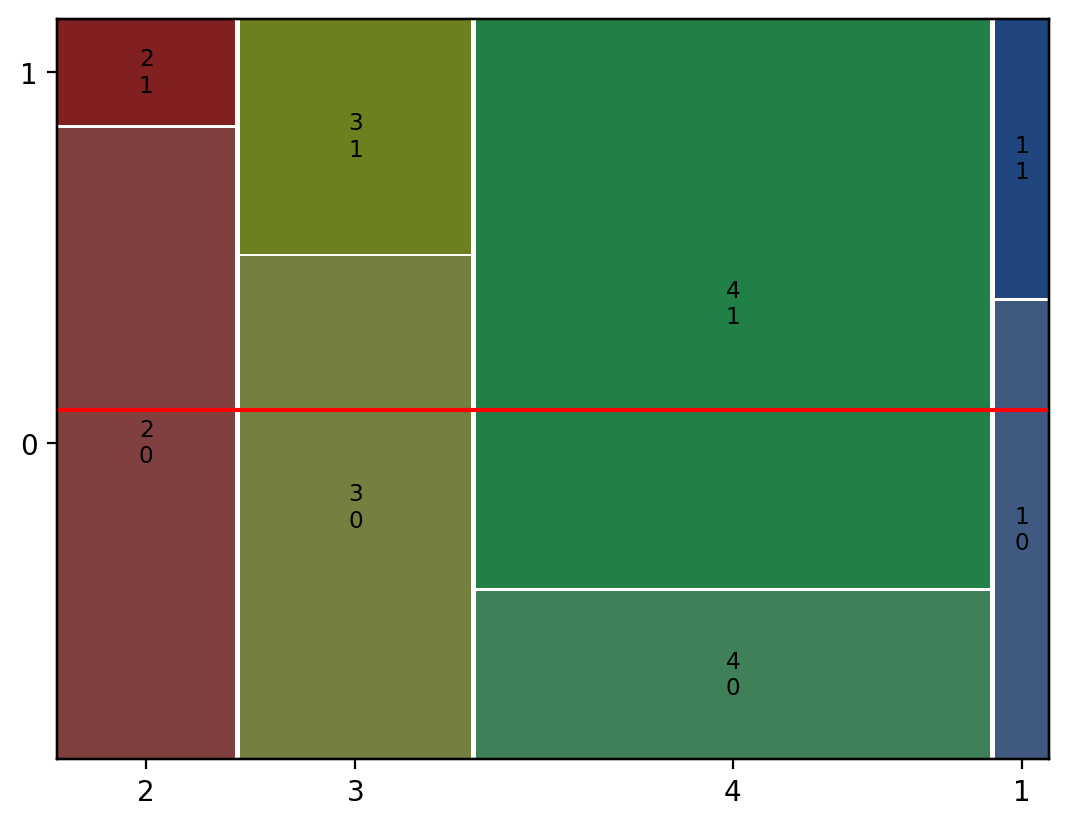

<시각화 : plot bar>


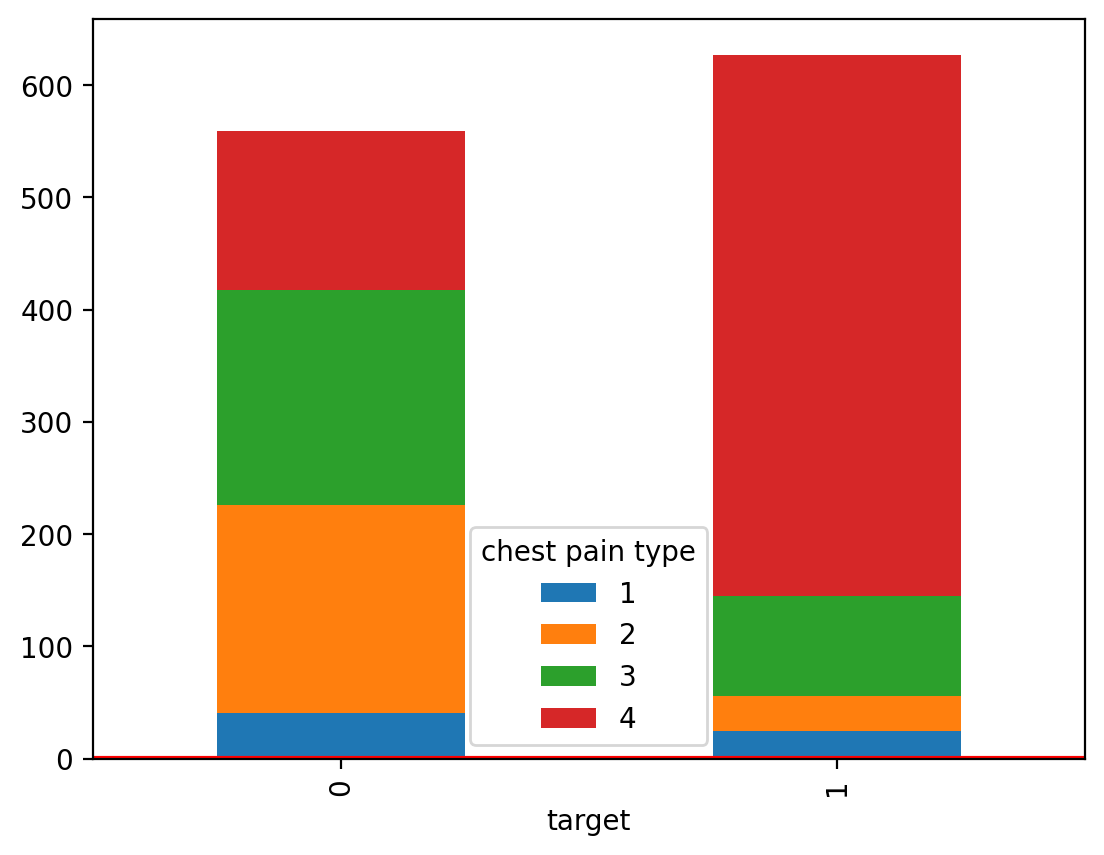

<카이제곱검정>
카이제곱통계량 333.2854499630863
p-value 6.203397147057978e-72
자유도 3
기대빈도
 [[ 31.1079258  101.80775717 131.97301855 294.11129848]
 [ 34.8920742  114.19224283 148.02698145 329.88870152]]


In [117]:
feature = 'chest pain type'
classification(target,feature)

### **(3) Fasting Blood sugar(공복혈당) -> target**

<교차표>


fasting blood sugar,0,1
target,,
0,493,66
1,442,185


<시각화 : mosaic>


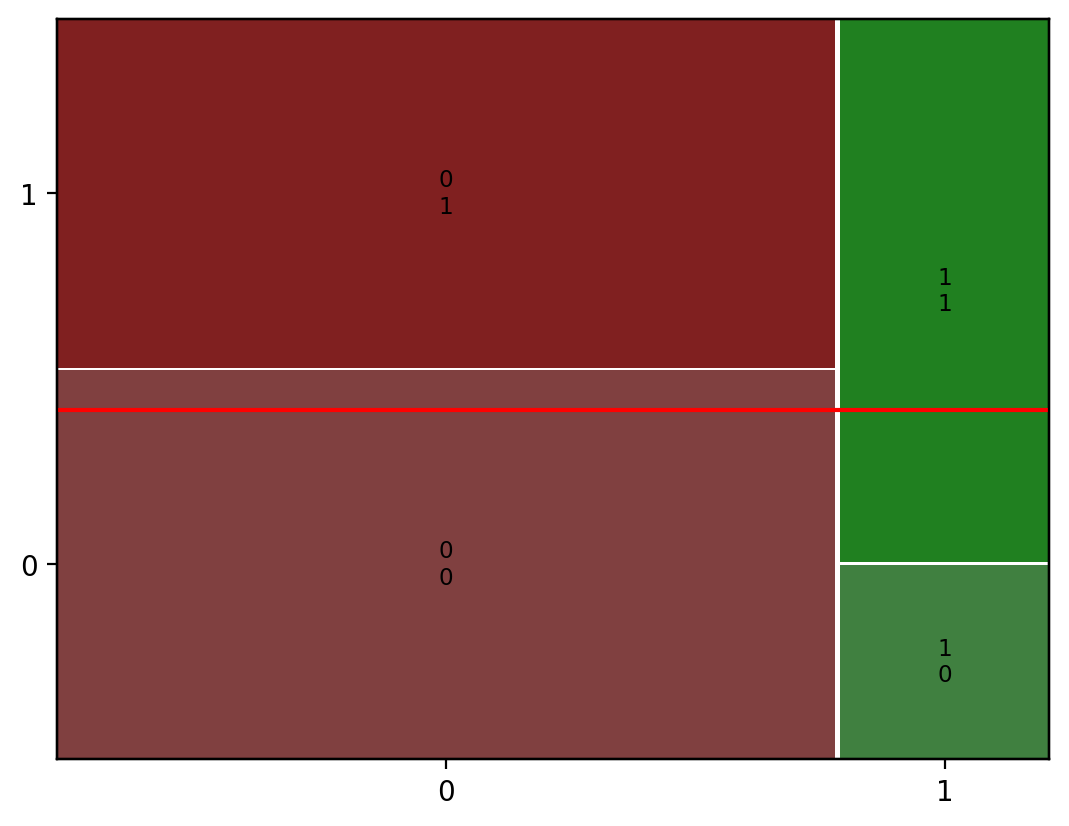

<시각화 : plot bar>


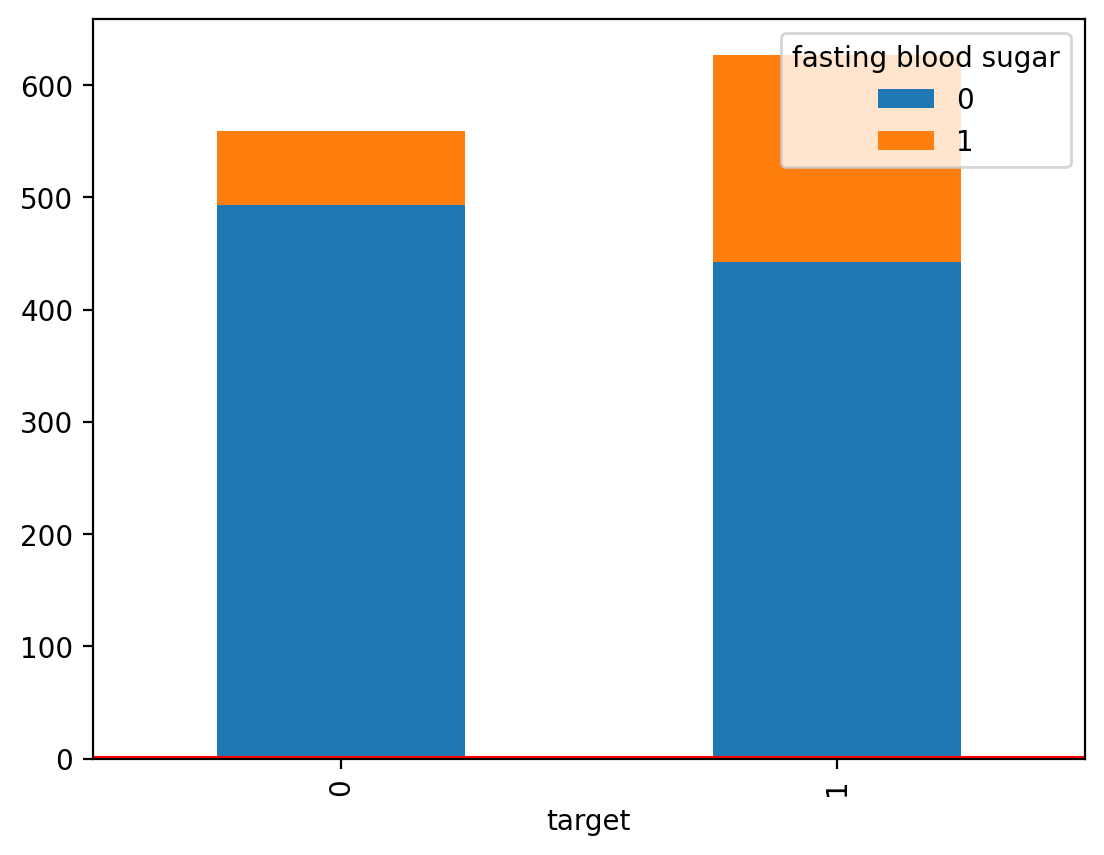

<카이제곱검정>
카이제곱통계량 54.42800575106284
p-value 1.6124837947263483e-13
자유도 1
기대빈도
 [[440.69561551 118.30438449]
 [494.30438449 132.69561551]]


In [118]:
feature = 'fasting blood sugar'
classification(target,feature)

### **(4) resting ecg (안정시 심전도 결과) -> target**

<교차표>


resting ecg,0,1,2
target,,,
0,353,61,145
1,329,119,179


<시각화 : mosaic>


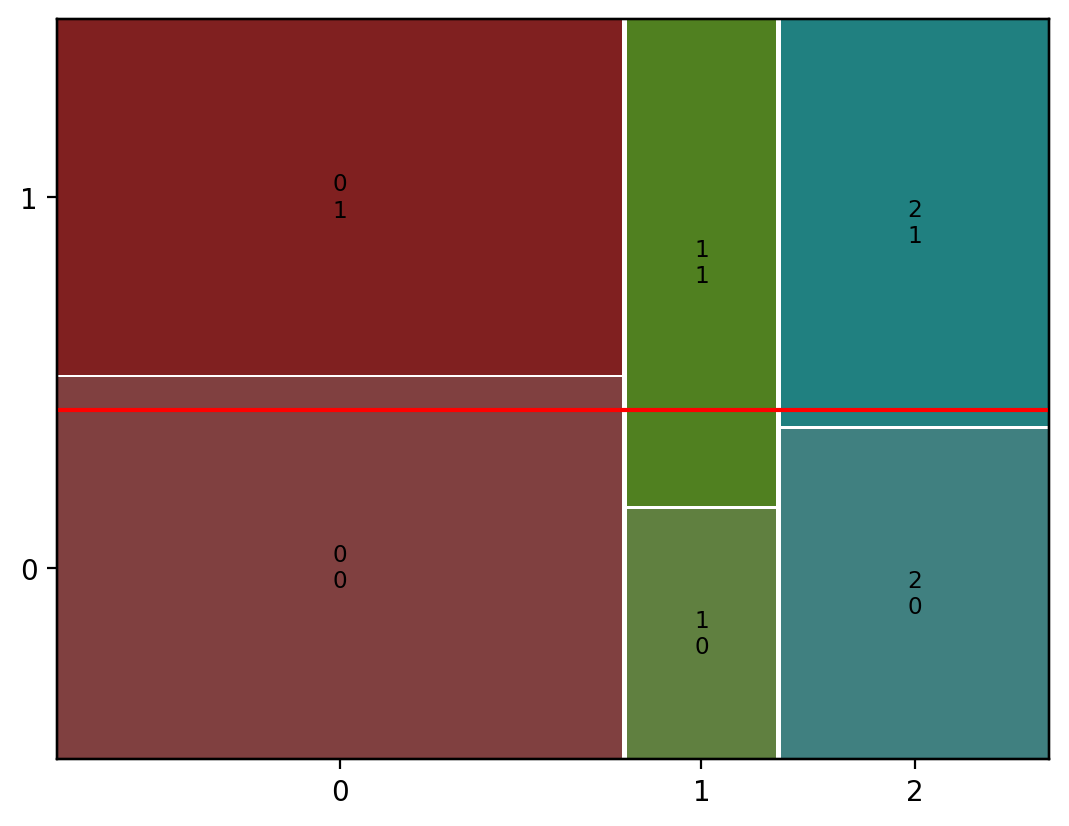

<시각화 : plot bar>


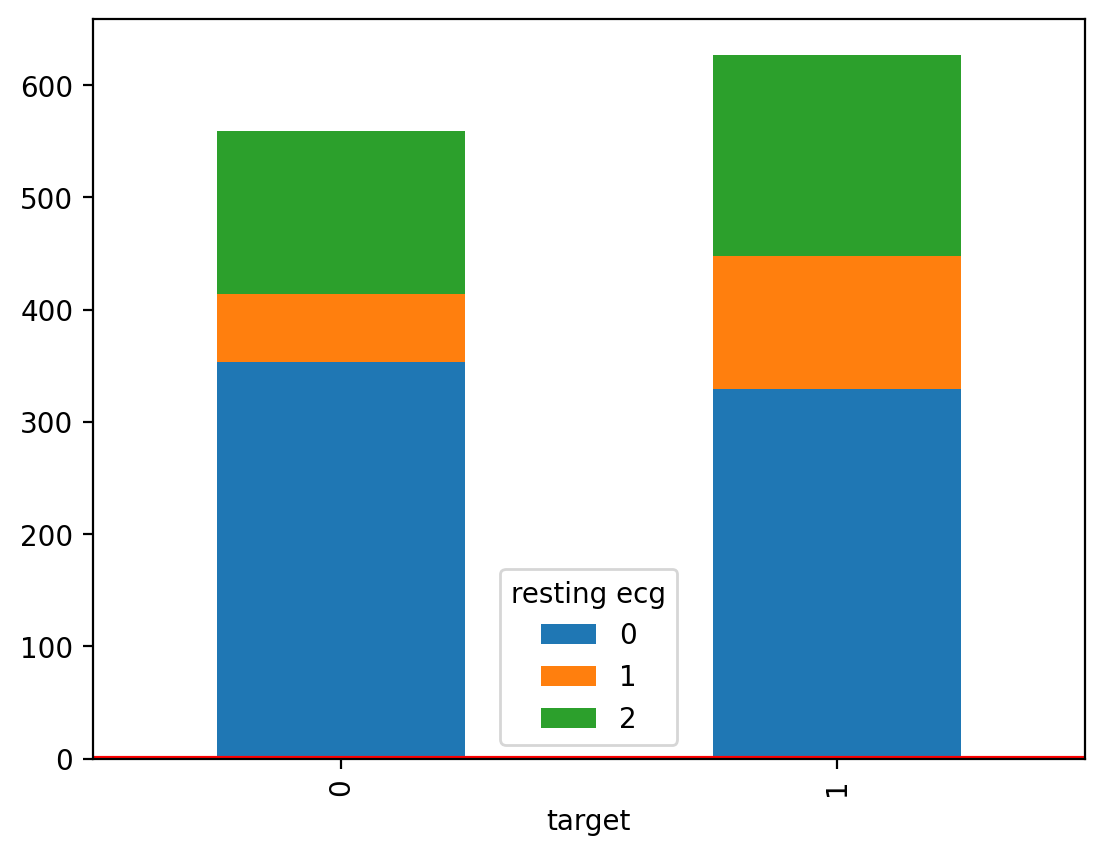

<카이제곱검정>
카이제곱통계량 19.265879395469526
p-value 6.553411588363347e-05
자유도 2
기대빈도
 [[321.44856661  84.83979764 152.71163575]
 [360.55143339  95.16020236 171.28836425]]


In [119]:
feature = 'resting ecg'
classification(target,feature)

### **(5) exercise angina -> target**

<교차표>


exercise angina,0,1
target,,
0,482,77
1,245,382


<시각화 : mosaic>


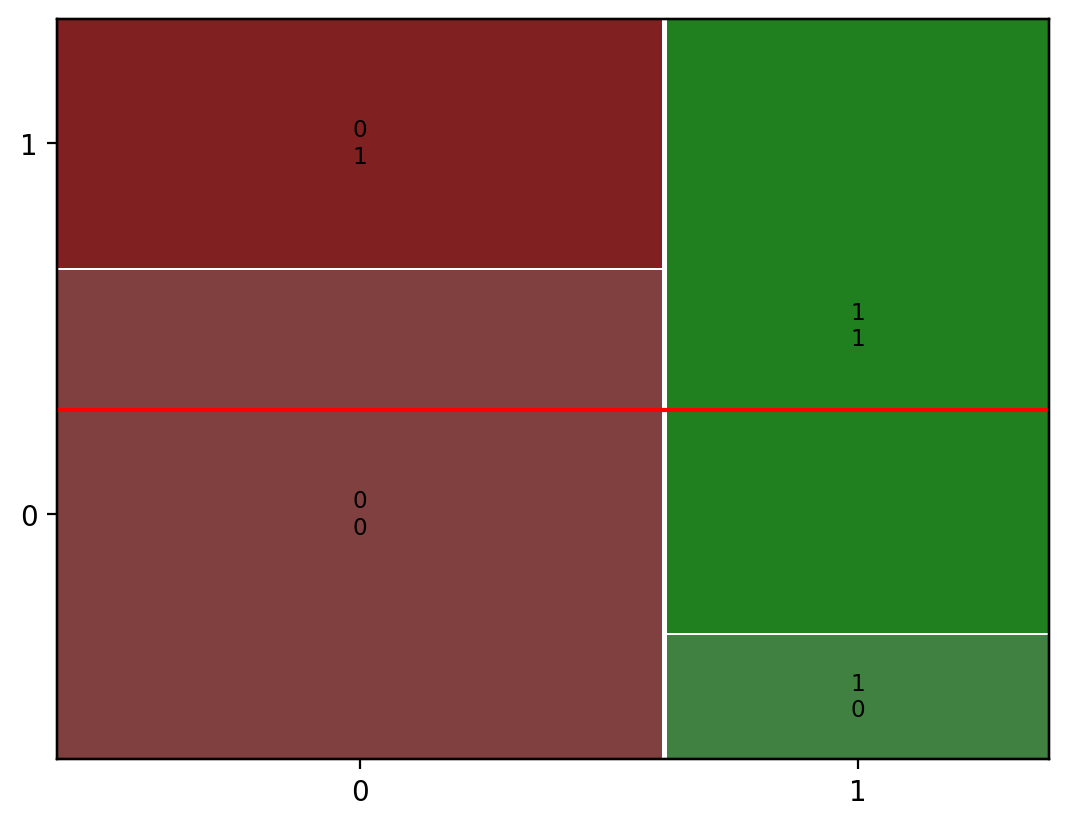

<시각화 : plot bar>


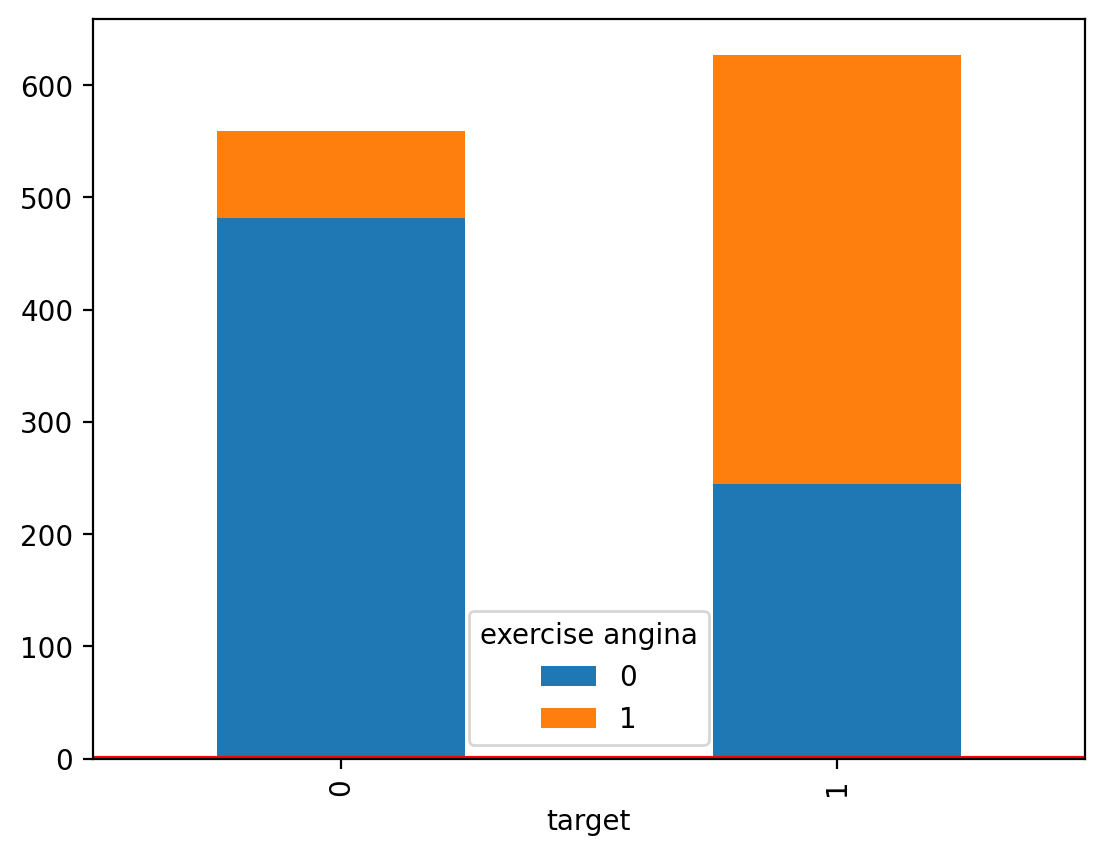

<카이제곱검정>
카이제곱통계량 274.95784527217387
p-value 9.427664956573469e-62
자유도 1
기대빈도
 [[342.65851602 216.34148398]
 [384.34148398 242.65851602]]


In [120]:
feature = 'exercise angina'
classification(target,feature)

### **(6) ST slope -> target**

<교차표>


ST slope,0,1,2,3
target,,,,
0,0,415,122,22
1,1,110,457,59


<시각화 : mosaic>


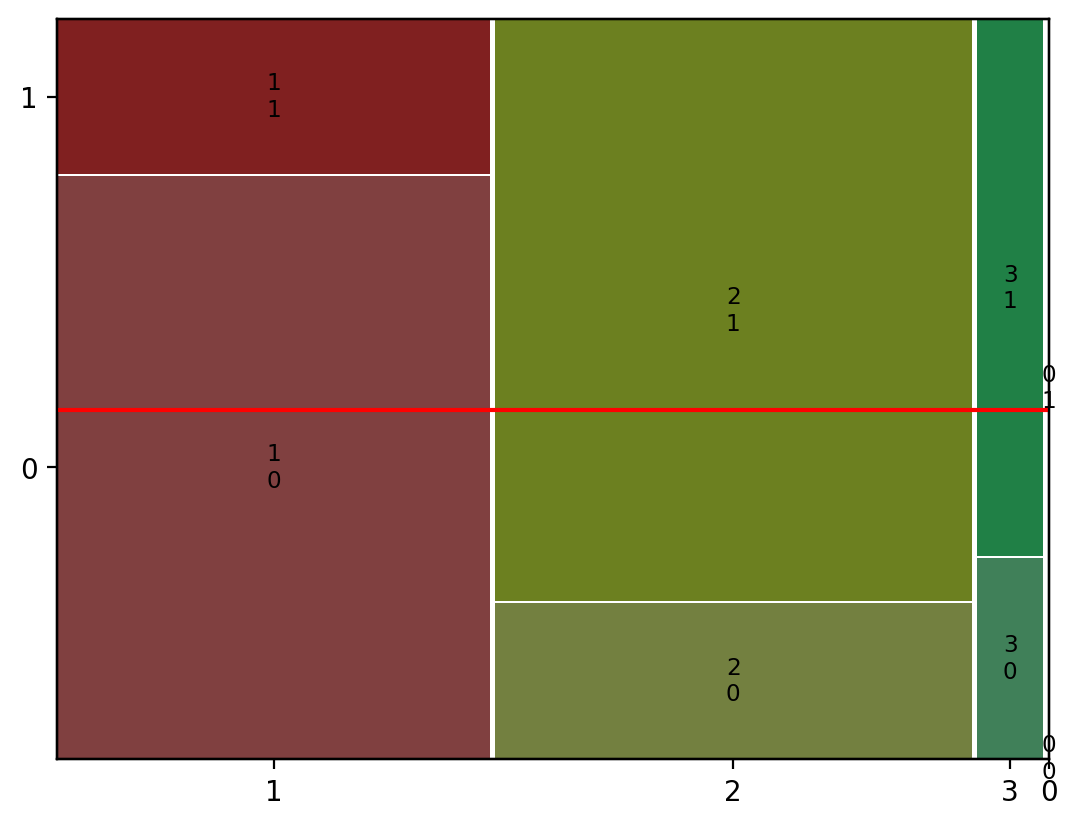

<시각화 : plot bar>


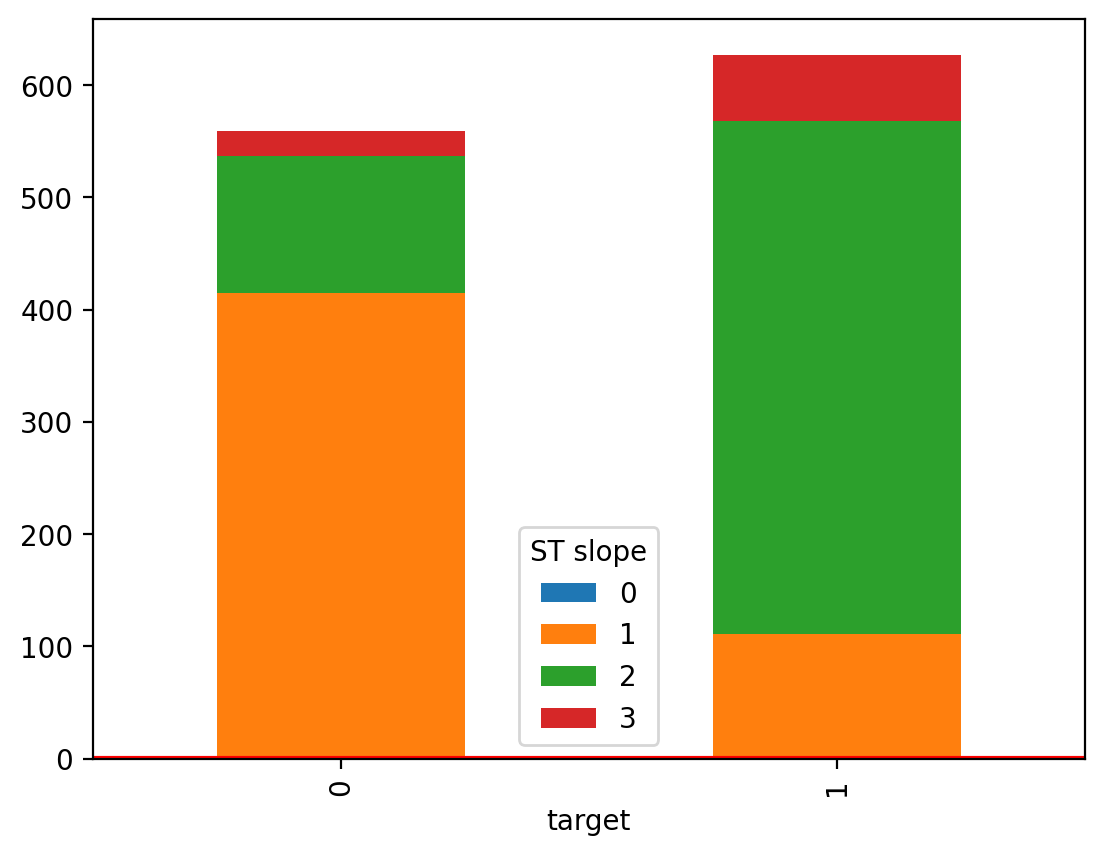

<카이제곱검정>
카이제곱통계량 386.2883247496809
p-value 2.0657219457323382e-83
자유도 3
기대빈도
 [[  0.47133221 247.44940978 272.90134907  38.17790894]
 [  0.52866779 277.55059022 306.09865093  42.82209106]]


In [121]:
feature = 'ST slope'
classification(target,feature)

# 5. 숫자 -> 범주

In [127]:
def numb(target,feature):
    #kdeplot 1
    print('<kdeplot 1>')
    sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
    plt.show()
    
    #kdeplot 2
    print('<kdeplot 2>')
    sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
    plt.axhline(data[target].mean(), color = 'r')
    plt.show()
    
    #히스토그램
    print('<히스토그램>')
    sns.histplot(x=feature,data=data,hue=target)
    plt.show()
    return

### **(1) age -> target**

<kdeplot 1>


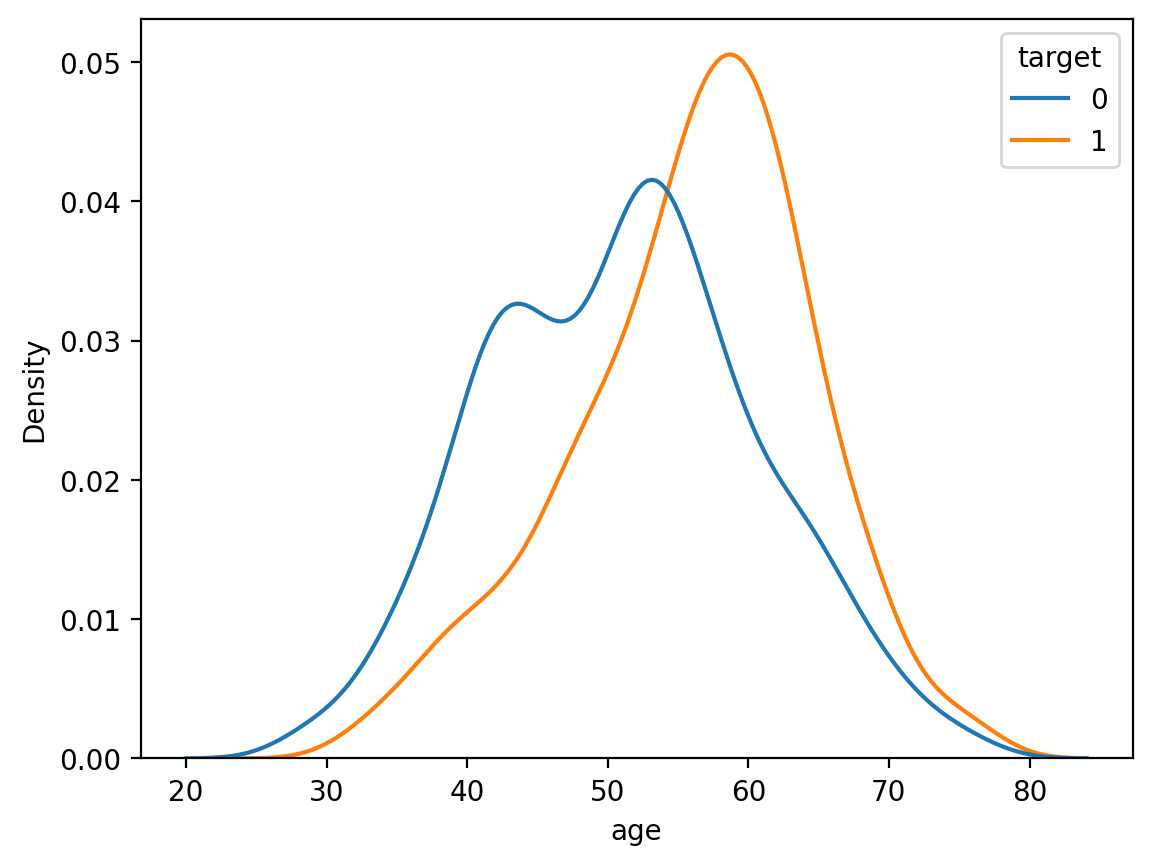

<kdeplot 2>


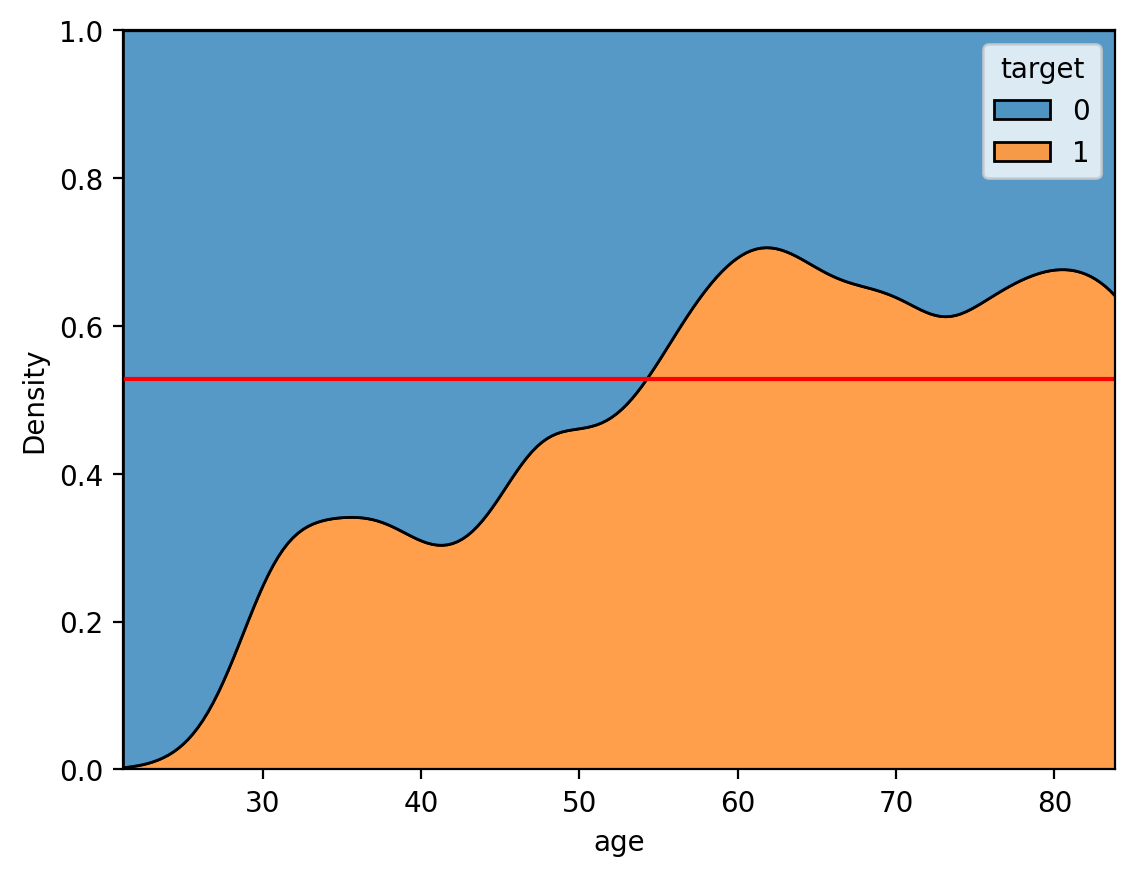

<히스토그램>


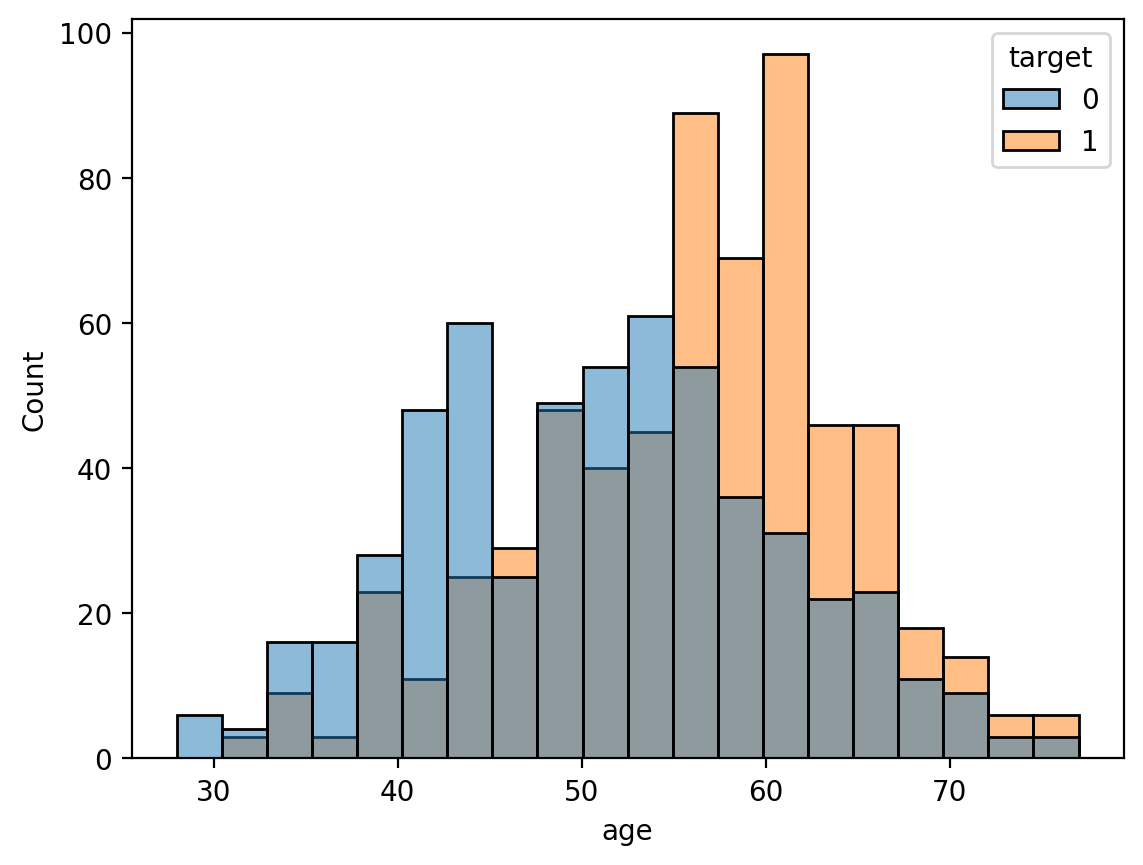

In [128]:
feature = 'age'
numb(target,feature)

### **(2) resting bp s -> target**

<kdeplot 1>


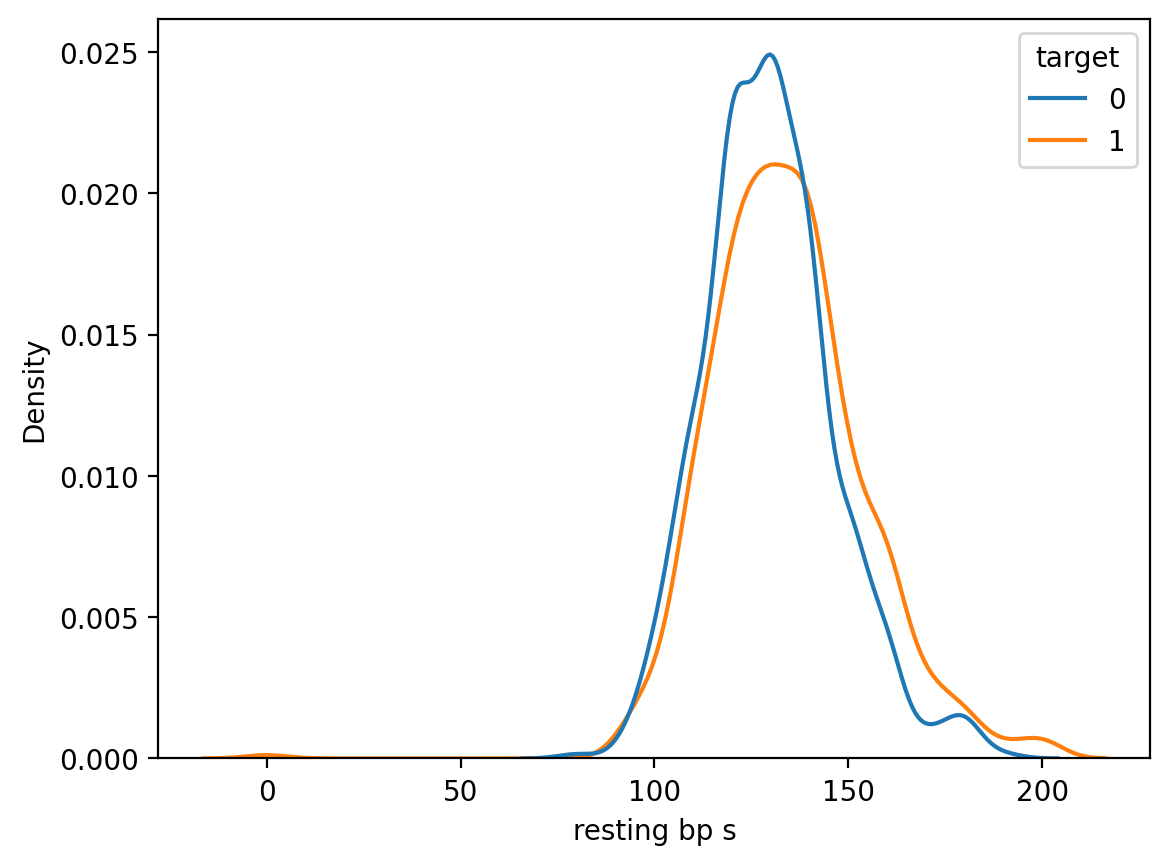

<kdeplot 2>


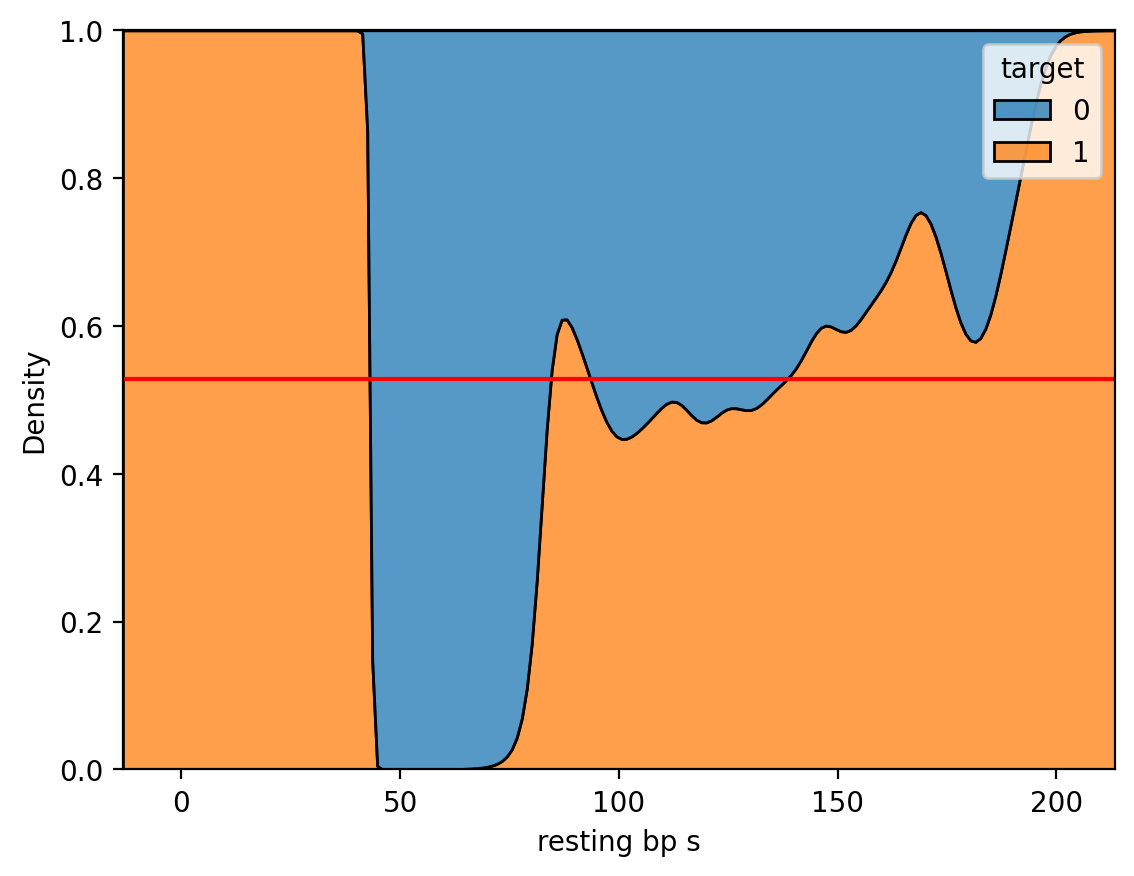

<히스토그램>


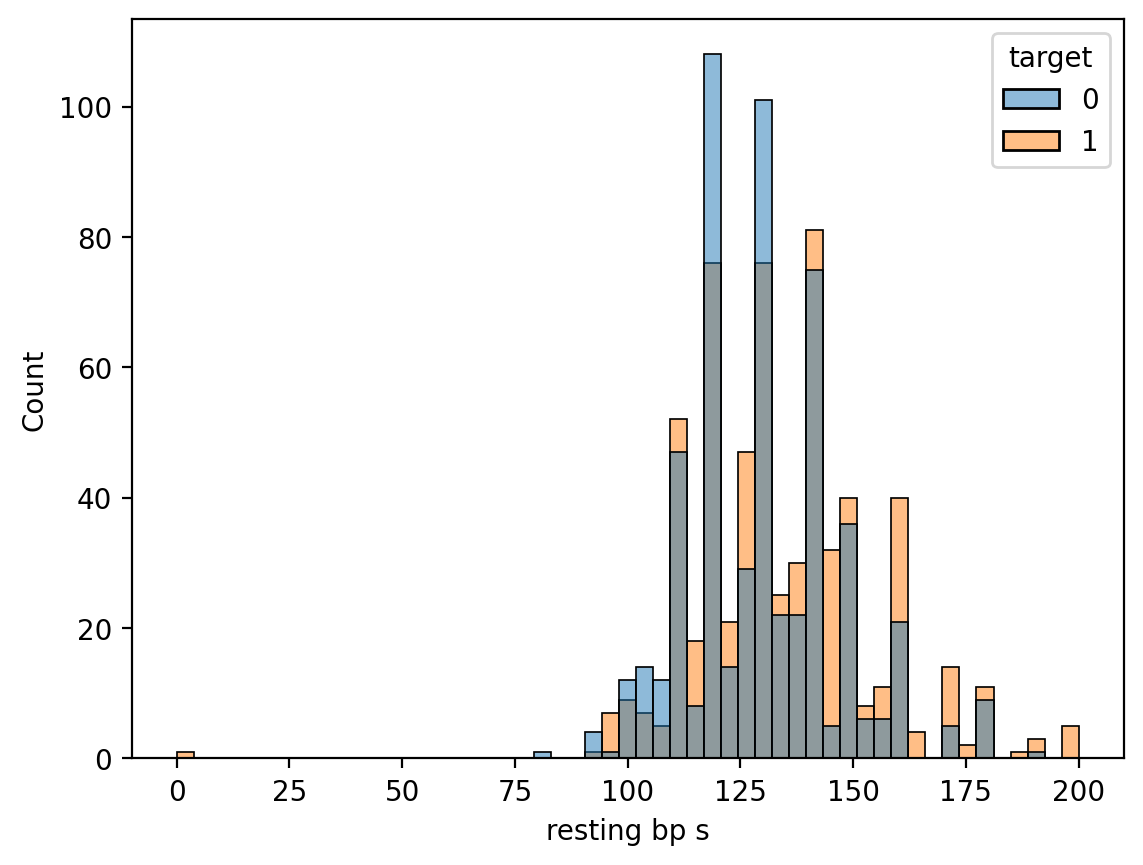

In [129]:
feature = 'resting bp s'
numb(target,feature)

### **(3) cholesterol -> target**

<kdeplot 1>


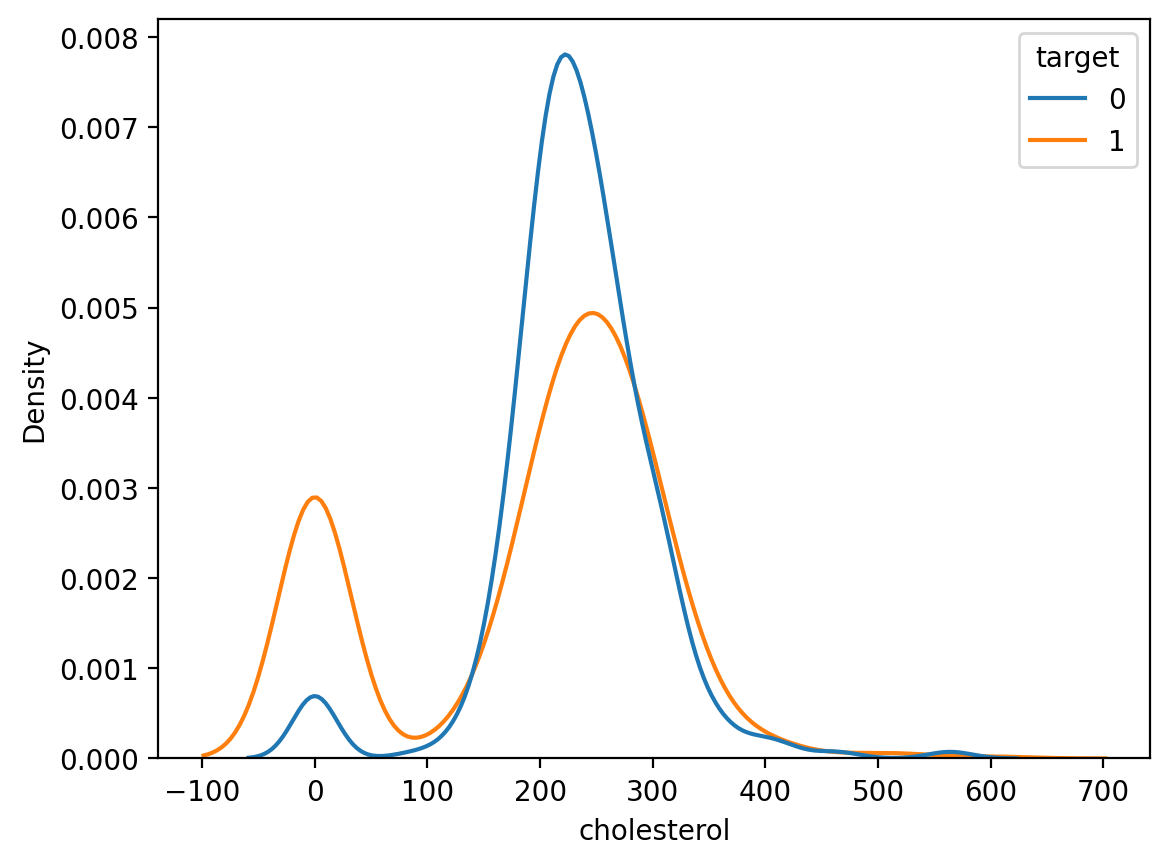

<kdeplot 2>


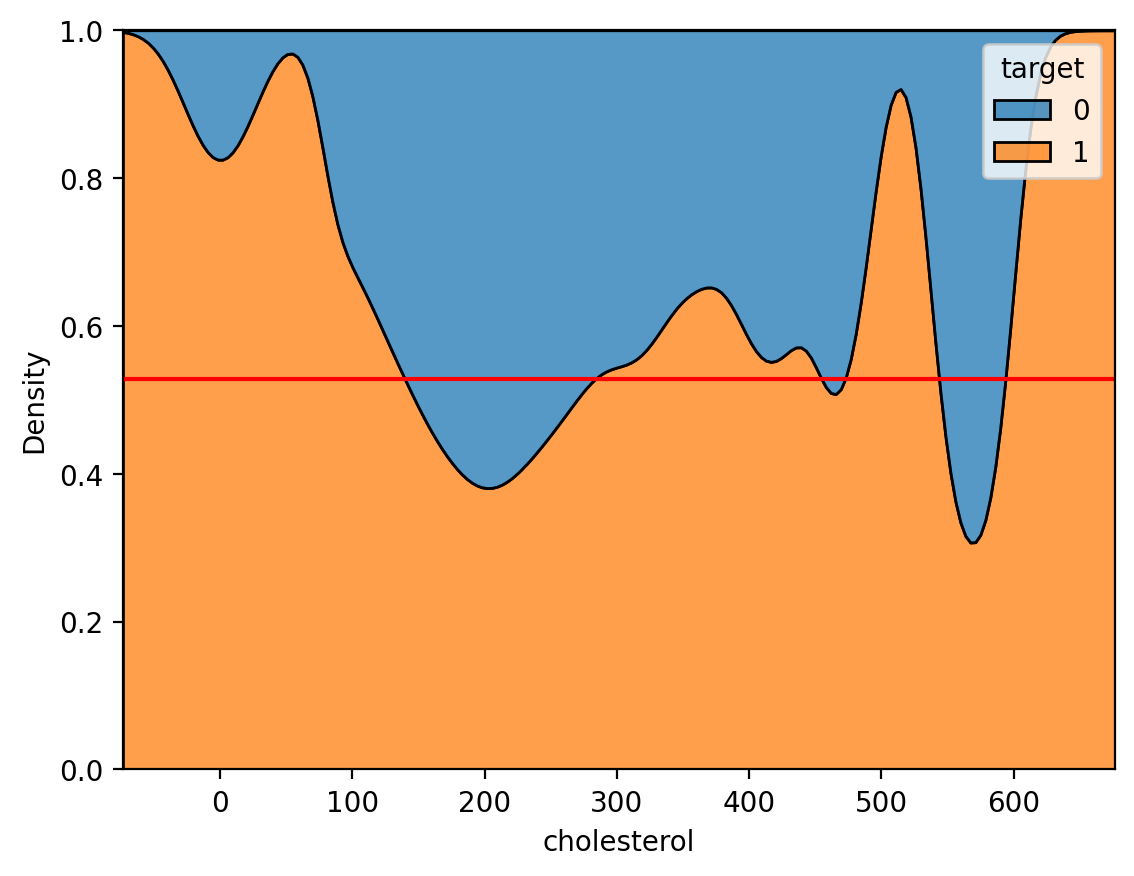

<히스토그램>


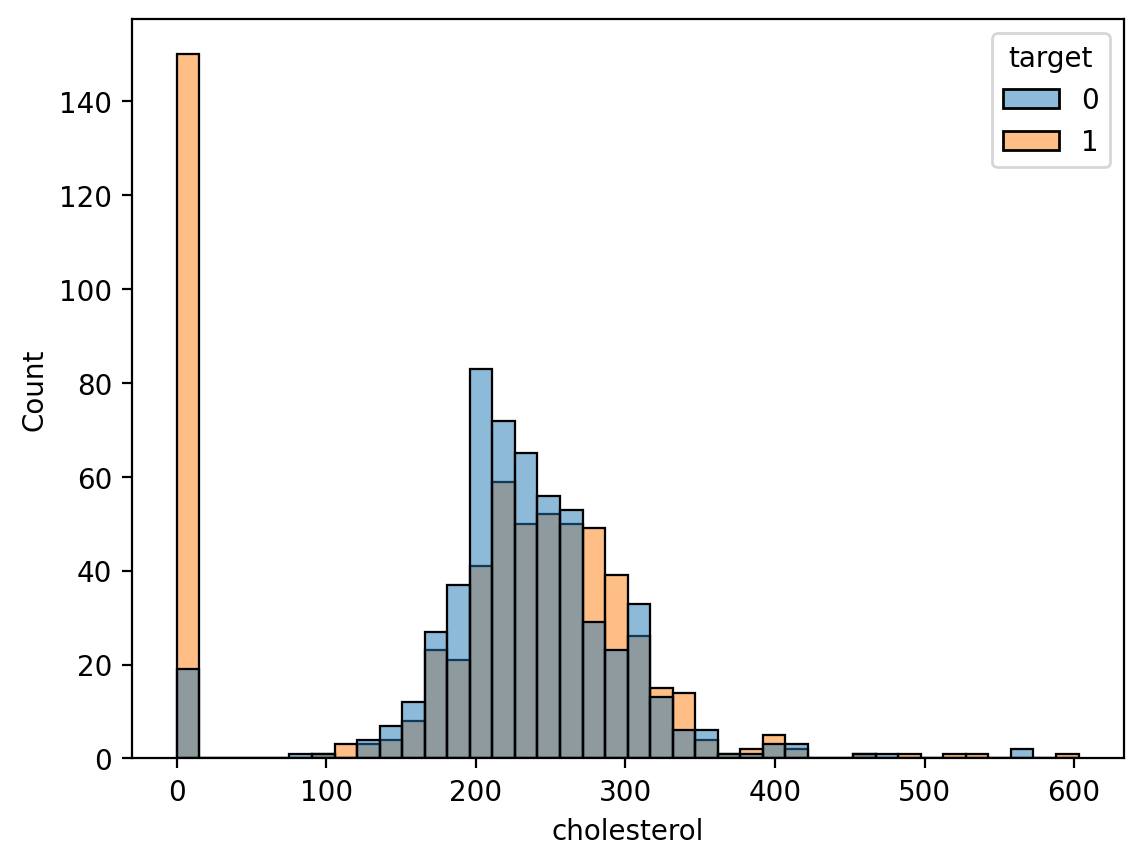

In [130]:
feature = 'cholesterol'
numb(target,feature)

### **(4) max heart rate -> target**

<kdeplot 1>


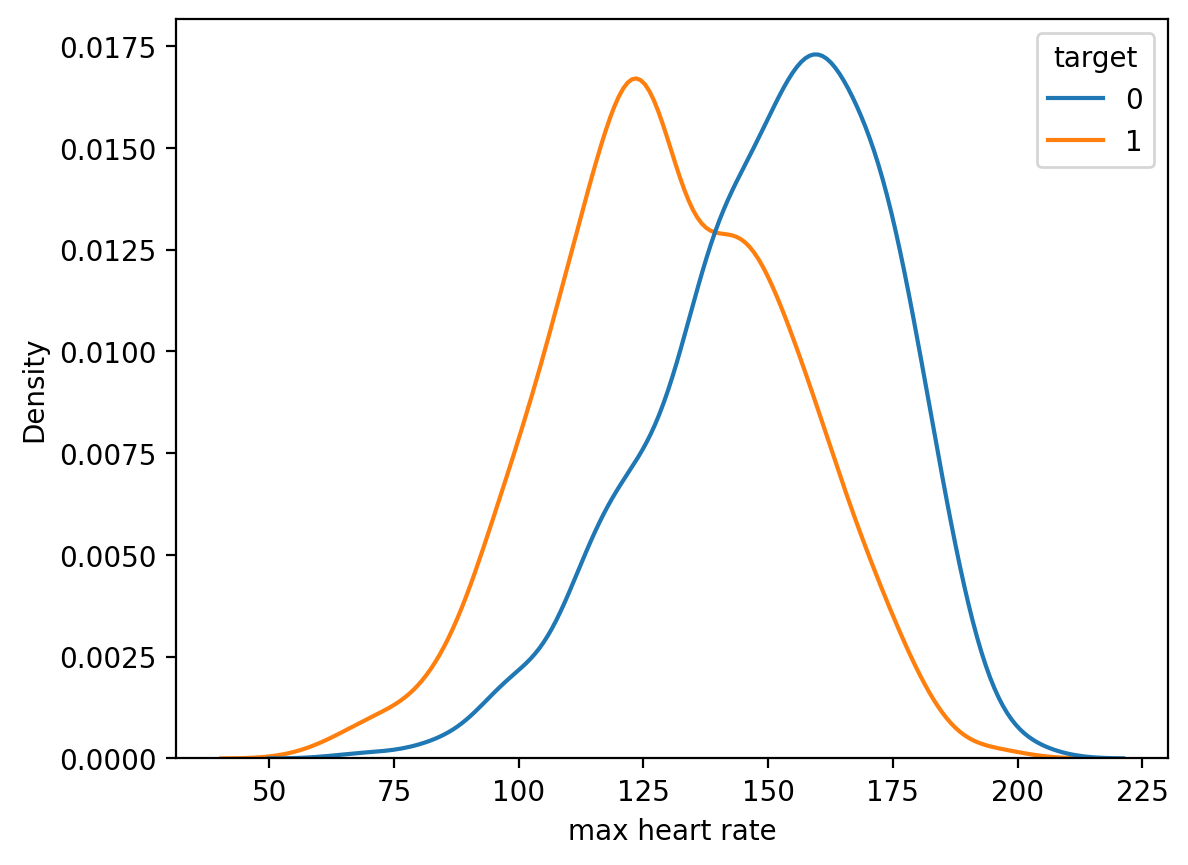

<kdeplot 2>


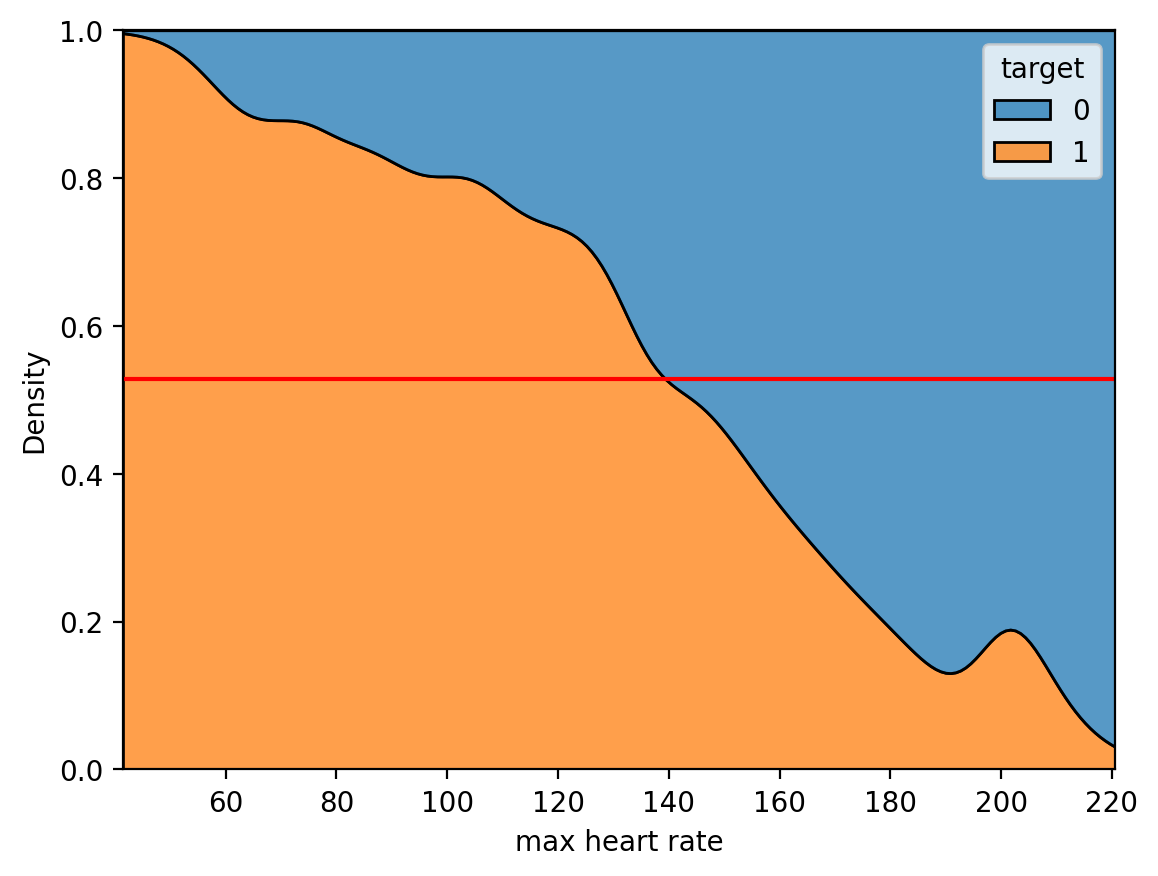

<히스토그램>


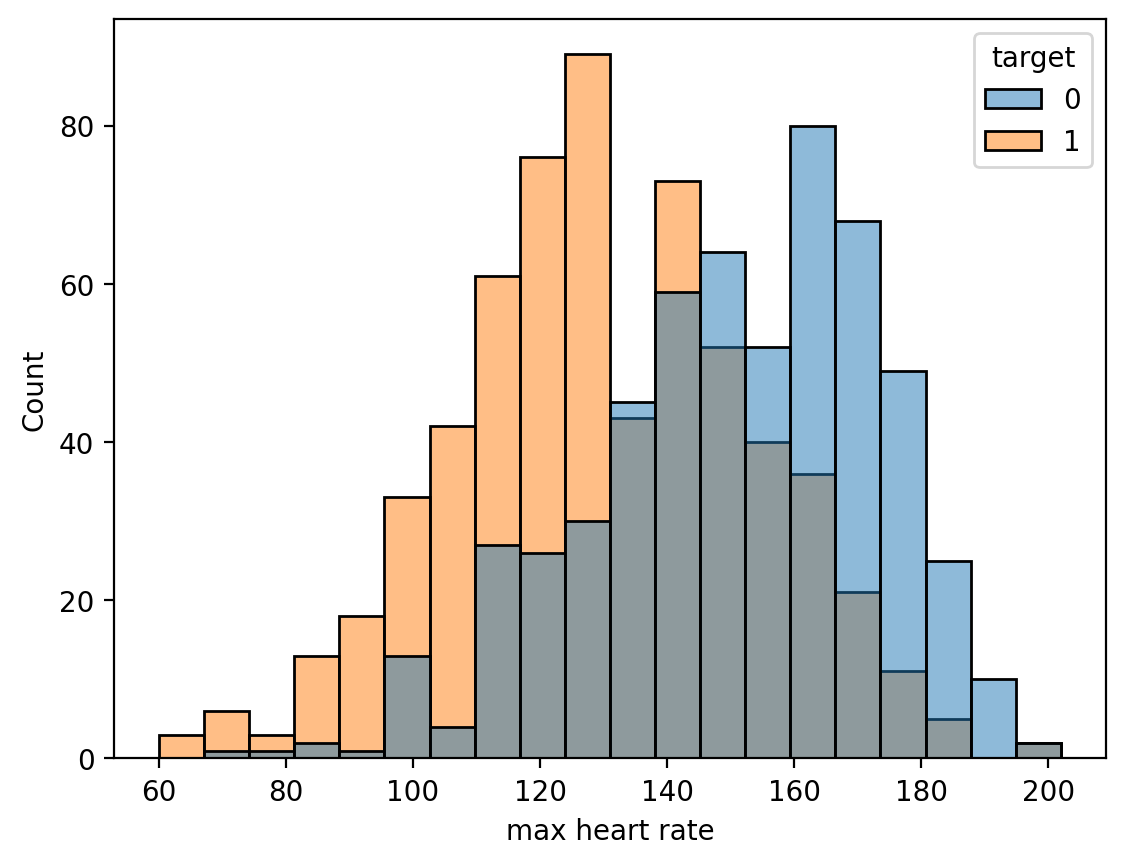

In [131]:
feature = 'max heart rate'
numb(target,feature)

### **(5) oldpeak -> target**

<kdeplot 1>


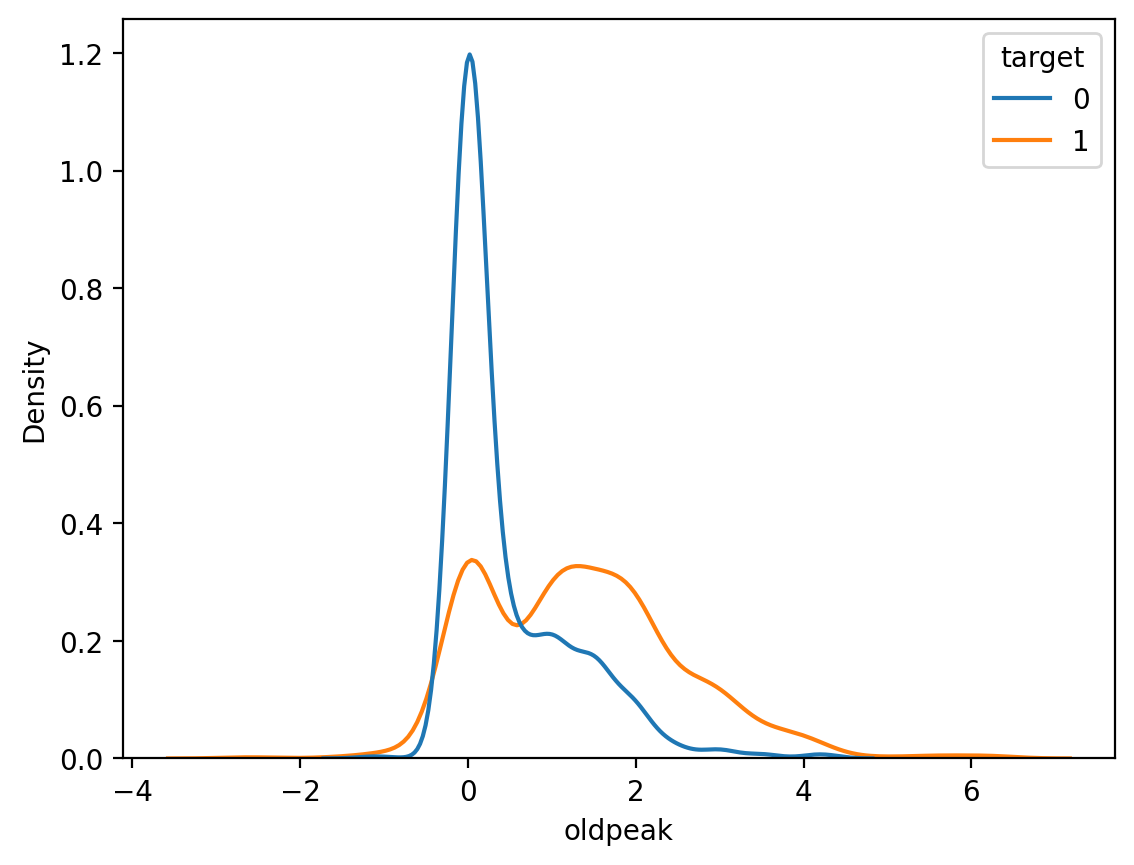

<kdeplot 2>


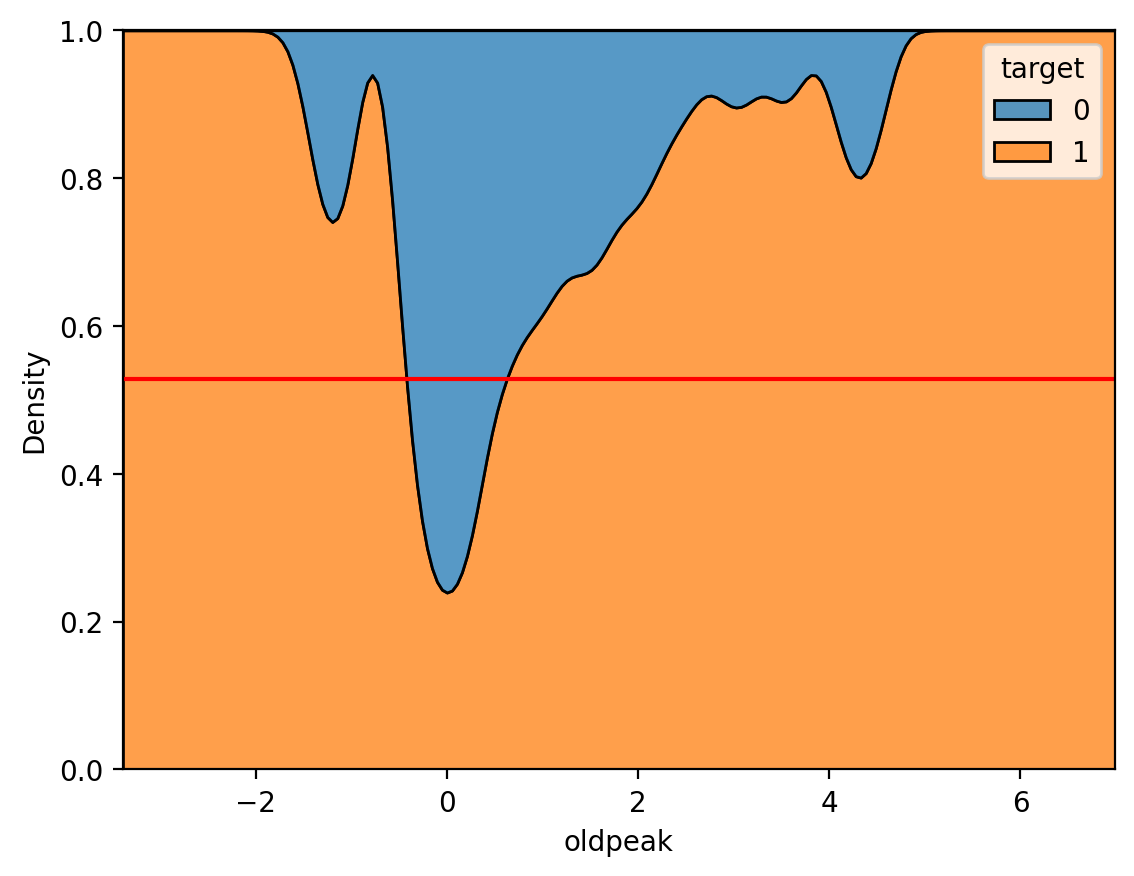

<히스토그램>


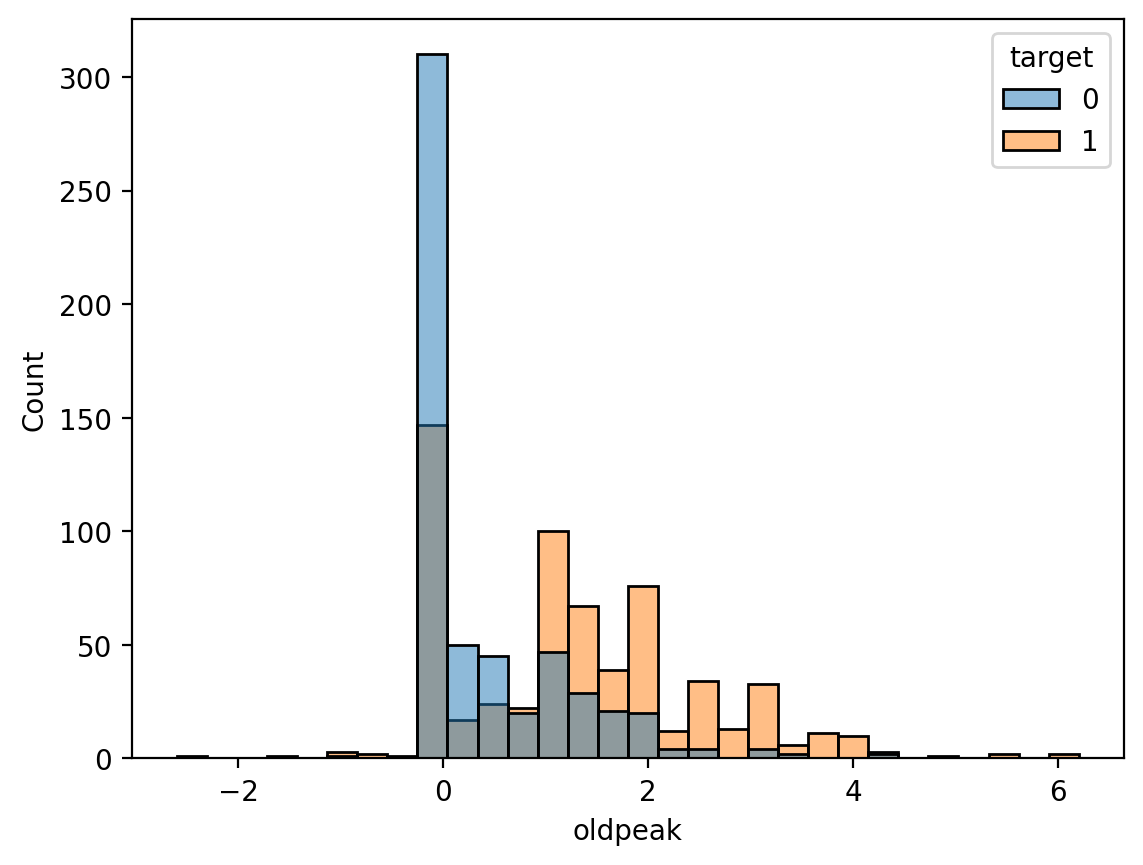

In [132]:
feature = 'oldpeak'
numb(target,feature)

-----

# 6. 머신러닝

**1) x,y 분리**

In [76]:
#target 확인
target = 'target'

#데이터 분리
x = data.drop(target,axis=1)
y = data.loc[:,target]

**2) 학습용, 평가용 데이터 분리**

In [77]:
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

**3) 모델링**

- 분류 문제(y가 범주형)
- 알고리즘 : KNeighborsClassifier

In [78]:
#1단계 : 불러오기
from sklearn.neighbors import KNeighborsClassifier

#2단계 : 선언하기
model = KNeighborsClassifier()

#3단계 : 학습하기
model.fit(x_train,y_train)

#4단계 : 예측하기
y_pred = model.predict(x_test)

**4) 분류 성능 평가**

In [80]:
from sklearn.metrics import confusion_matrix

#성능 평가
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[109  51]
 [ 59 137]]


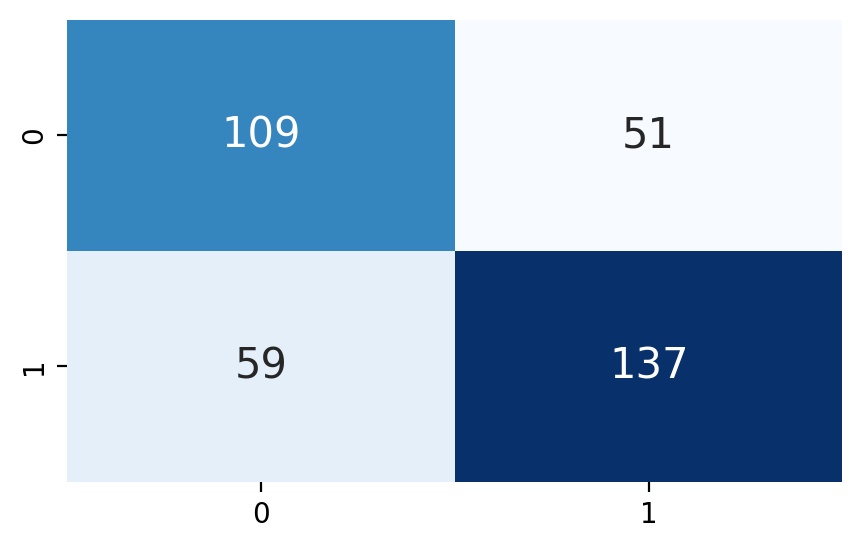

In [83]:
#혼돈행렬 시각화
plt.figure(figsize=(5,3))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap='Blues',
            cbar=False,
            annot_kws={'size':15})
plt.show()

1) accuracy

$$\large Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

In [88]:
from sklearn.metrics import accuracy_score
print('정확도:',accuracy_score(y_pred,y_test))

정확도: 0.6910112359550562


2) Precision

$$\large Precision = \frac{TP}{TP+FP}$$

In [87]:
from sklearn.metrics import precision_score
print('정밀도:',precision_score(y_pred,y_test))

정밀도: 0.7287234042553191


3) Recall

$$\large Recall = \frac{TP}{TP+FN}$$

In [89]:
from sklearn.metrics import recall_score
print('재현율:',recall_score(y_pred,y_test))

재현율: 0.6989795918367347


4) F1-Score

$$\large F1 = \frac{2\times Precision\times Recall}{Precision+Recall}$$

In [90]:
from sklearn.metrics import f1_score
print('f1:',f1_score(y_pred,y_test))

f1: 0.7135416666666667


5) Classification Report

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       160
           1       0.73      0.70      0.71       196

    accuracy                           0.69       356
   macro avg       0.69      0.69      0.69       356
weighted avg       0.69      0.69      0.69       356

